<a href="https://colab.research.google.com/github/ZionOchayon/Machine-Learning-Deep-Learning-Image-Processing/blob/main/ONO_Mid_term_exercise_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mid-term exercise

#1. Load your libraries here:

In [ ]:
#your code here:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

#Upload your data file:

In [ ]:
from google.colab import files
file = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


#2. Read the file into a pandas data frame:
Split your data to:

X: the feature matrix

y: the label vector

In [ ]:
df = pd.read_csv("/content/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Categorical column arrangement using pandas one hot encoding
df = pd.get_dummies(df, columns=["State","International plan","Voice mail plan","Churn"],drop_first=True)
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes,Churn_True
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Columns used as predictors

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

#3. A. create and print a plot that demonstartes the frequency of each class of the label variable (Y). In addition, print the count of each of the classes  of the label variable (Y).

Binary Class Counts:
0    2850
1     483
Name: Churn_True, dtype: int64


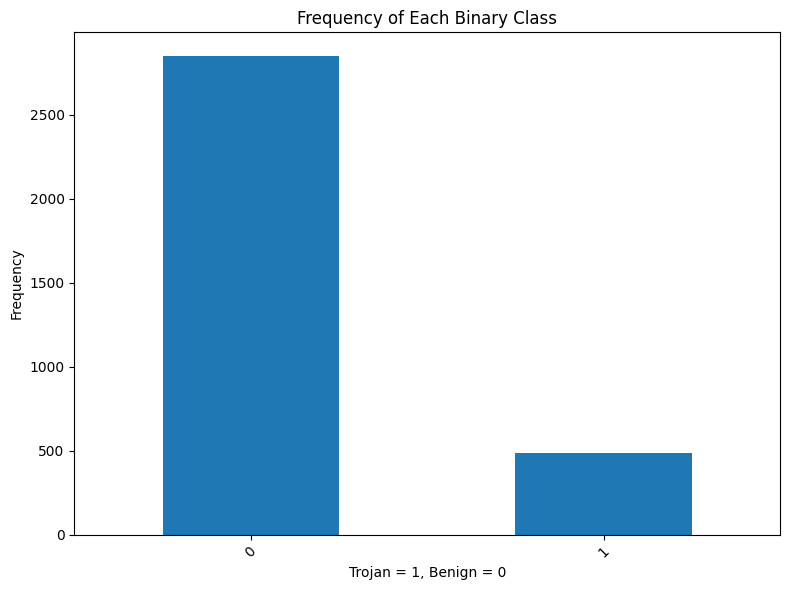

In [ ]:
#your code here: - using chatGPT

# Count the frequency of each new class
binary_class_counts = df.iloc[:, -1].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
binary_class_counts.plot(kind='bar')
plt.title('Frequency of Each Binary Class')
plt.xlabel('Trojan = 1, Benign = 0')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Print the count of each binary class
print("Binary Class Counts:")
print(binary_class_counts)

# Show the plot
plt.show()

#B. Verbally explain if balancing the label is required, why? (in 2-3 lines)


#Your answer here:

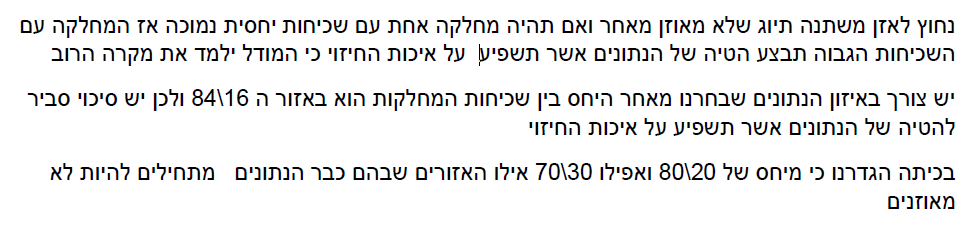






#C. If balancing is required, choose one over-sampling and one under-sampling balancing methods and perform them on your data.

Verbally explain the logic behind the chosen balancing metohd, how does it work?

In [ ]:
#your code here, if balancing is requierd:

# Undersampling
technique = RandomUnderSampler().__class__.__name__
print(f'Technique: {technique}')
print(f'Before resampling: {sorted(Counter(y).items())}')
X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)
print(f'After resampling: {sorted(Counter(y_resampled).items())}')

# Oversampling
technique = SMOTE().__class__.__name__
print(f'Technique: {technique}')
print(f'Before resampling: {sorted(Counter(y).items())}')
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(f'After resampling: {sorted(Counter(y_resampled).items())}')

Technique: RandomUnderSampler
Before resampling: [(0, 2850), (1, 483)]
After resampling: [(0, 483), (1, 483)]
Technique: SMOTE
Before resampling: [(0, 2850), (1, 483)]
After resampling: [(0, 2850), (1, 2850)]


#Your answer here:

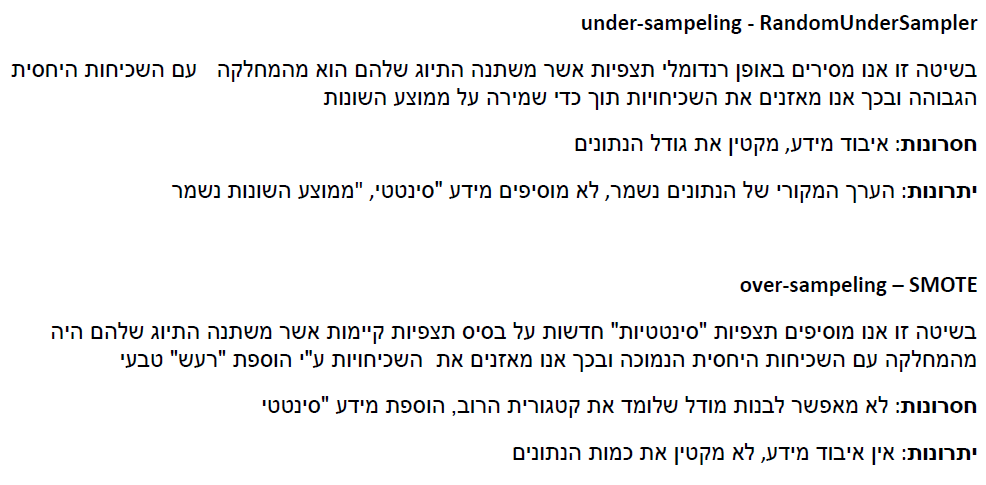




#If balancing is not required, briefly explain why and choose one under-sampling method and one over-sampling method for balancing and perform them on your data.
Additionally, verbally explain the logic behind the chosen balancing metohds, how does it work? (in 3 lines)

In [ ]:
#your code here, if balancing is not requierd: (still perform balancing)

#4. Check for missing values:

In [ ]:
#your code here:

print(pd.DataFrame(X_resampled).isnull().sum())
print(pd.DataFrame(y_resampled).isnull().sum())

0     0
1     0
2     0
3     0
4     0
     ..
63    0
64    0
65    0
66    0
67    0
Length: 68, dtype: int64
0    0
dtype: int64


If there are no missing values in your data, follow the next steps:
1. uncomment the following function by:

  a. selecting all the code in the chunk

  b. pressing "ctrl"+"/" to uncomment all lines
2. assign the missing values-containing data to a new variable name (see example below).

Say my dataset features is named X.

Than the use of the function would be:


```
X_missing=add_missing_values(X)
 ```






In [ ]:
def add_missing_values(X_full):
     import numpy as np
     Col_names=X_full.columns
     X_full=X_full.to_numpy()
     rng = np.random.RandomState(4)
     n_samples, n_features = X_full.shape

     # Add missing values in 75% of the lines
     missing_rate = 0.75
     n_missing_samples = int(n_samples * missing_rate)

     missing_samples = np.zeros(n_samples, dtype=bool)
     missing_samples[:n_missing_samples] = True

     rng.shuffle(missing_samples)
     missing_features = rng.randint(0, n_features, n_missing_samples)
     X_missing = X_full.copy()
     X_missing[missing_samples, missing_features] = np.nan
     X_missing=pd.DataFrame(X_missing)
     X_missing.columns=Col_names
     return X_missing

In [ ]:
#your code here, if there are no missing values:

X_missing = add_missing_values(pd.DataFrame(X_resampled))
X_missing.isnull().sum()

0     58
1     62
2     64
3     57
4     70
      ..
63    63
64    58
65    68
66    48
67    56
Length: 68, dtype: int64


#5. Impute the missing values using three different methods and assign the imputed output datasets into variables:

In [ ]:
#your code here:

# Impute missing values using mean strategy
imr = SimpleImputer(missing_values=np.nan , strategy='mean')
imr = imr.fit(X_missing.values)
imputed_data_mean = imr.transform(X_missing.values)
pd.DataFrame(imputed_data_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
63    0
64    0
65    0
66    0
67    0
Length: 68, dtype: int64

In [ ]:
# Impute missing values using median strategy
imr = SimpleImputer(missing_values=np.nan , strategy='median')
imr = imr.fit(X_missing.values)
imputed_data_median = imr.transform(X_missing.values)
pd.DataFrame(imputed_data_median).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
63    0
64    0
65    0
66    0
67    0
Length: 68, dtype: int64

In [ ]:
# Impute missing values using most frequent strategy
imr = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
imr = imr.fit(X_missing.values)
imputed_data_frequent = imr.transform(X_missing.values)
pd.DataFrame(imputed_data_frequent).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
63    0
64    0
65    0
66    0
67    0
Length: 68, dtype: int64

#6. Preprocessing (for both imputed datasets):
standardize or normalize the data


In [ ]:
#your code here:

# Normalize the three tables for mean, median, most frequent
transformer = Normalizer().fit(imputed_data_mean)
imputed_data_mean_norm = transformer.transform(imputed_data_mean)

transformer = Normalizer().fit(imputed_data_median)
imputed_data_median_norm = transformer.transform(imputed_data_median)

transformer = Normalizer().fit(imputed_data_frequent)
imputed_data_frequent_norm = transformer.transform(imputed_data_frequent)

pd.DataFrame(imputed_data_mean_norm).head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.204678,0.663603,0.039976,0.423907,0.175895,0.072069,0.315651,0.158305,0.026832,0.391286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001599
1,0.180573,0.700352,0.043877,0.272715,0.207574,0.046358,0.329925,0.173822,0.028048,0.429324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001688
2,0.238727,0.723151,0.000000,0.424132,0.198649,0.072106,0.211195,0.191679,0.017948,0.283336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.146388,0.711029,0.000000,0.521770,0.123733,0.088704,0.107874,0.153359,0.009167,0.343141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001743,0.000000
4,0.135577,0.750193,0.000000,0.301343,0.204269,0.051230,0.268081,0.220539,0.022795,0.337858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001808,0.000000


#7. Train test split:

In [ ]:
#your code here:

X_train1, X_test1, y_train1, y_test1 = train_test_split(imputed_data_mean_norm, y_resampled,
                                       test_size=0.8,
                                       random_state=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(imputed_data_median_norm, y_resampled,
                                       test_size=0.8,
                                       random_state=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(imputed_data_frequent_norm, y_resampled,
                                       test_size=0.8,
                                       random_state=1)

#8. Training models (for both imputed datasets):
**a.** choose **three** classification algorithms, one must be either random forest or XGBoost or catboost,another must be an algorithm that **wasn't** discussed in class and apply the algorithms on the train set.  

**b.** apply hyperparameter tuning on  two out of three algorithms using gridsearchCV function.

Apply a pipeline to the learning process of one of the algorithms, pipeing must include:


*   imputation
*   standardization or normalization
*   chossing the learning algorithm and a dictionary for the hyperparameter search.

##In this part you should create 9 learning models: 3 imputed dataframes * 3 algorithms

**c.** print the best hyperparameters for both models.
reminder, if the tuned model is named "grid" than to get the best hyperparameter combination use the following function:


```
grid.best_params_
```


**d.** Veraverbally explain: what is the role of the chosen hyperparmeters in the learning algorithms? Explain how the unlearned algorithm that you chose works. (in 3-4 lines)


In [ ]:
#your code here:

# Grid search using Random forest and Ridge classifier
models = {
    'RandomForest': RandomForestClassifier(),
    'Ridge': RidgeClassifier()
}
params = {
    'RandomForest':{
      'n_estimators': [150, 250, 300],
      'max_features': ['sqrt', 'log2'],
      'max_depth': [10,15,20]
    },
    'Ridge':{
        'alpha': [0.001, 0.01],
        'tol': [0.0001,0.001],
        'solver': ['auto','sag']
    }
}

# Uses to store the traind models
grid_models = {}

# Performe the GridSearch with Cross validetion
for model_name in models.keys() :
    grid_models[model_name+' mean'] = GridSearchCV(models[model_name],params[model_name],cv=8).fit(X_train1, y_train1)
    grid_models[model_name+' median'] = GridSearchCV(models[model_name],params[model_name],cv=8).fit(X_train2, y_train2)
    grid_models[model_name+' frequent'] = GridSearchCV(models[model_name],params[model_name],cv=8).fit(X_train3, y_train3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Grid search with pipeline for KNN

steps = [("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
        ("knn",KNeighborsClassifier())]

pipe = Pipeline(steps)
params ={'knn__n_neighbors': [3,5], 'knn__metric': ['euclidean', 'manhattan']}

# Performe the GridSearch with pipe line and Cross validetion
grid_models['KNeighbors mean'] = GridSearchCV(pipe,params,cv=8).fit(X_train1,y_train1)
grid_models['KNeighbors median'] = GridSearchCV(pipe,params,cv=8).fit(X_train2,y_train2)
grid_models['KNeighbors frequent'] = GridSearchCV(pipe,params,cv=8).fit(X_train3,y_train3)

In [ ]:
# Print the best param
for grid in grid_models.values():
  print(grid.best_params_)

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 250}
{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 150}
{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 250}
{'alpha': 0.001, 'solver': 'auto', 'tol': 0.0001}
{'alpha': 0.001, 'solver': 'sag', 'tol': 0.0001}
{'alpha': 0.001, 'solver': 'auto', 'tol': 0.0001}
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3}


#Your answer here:
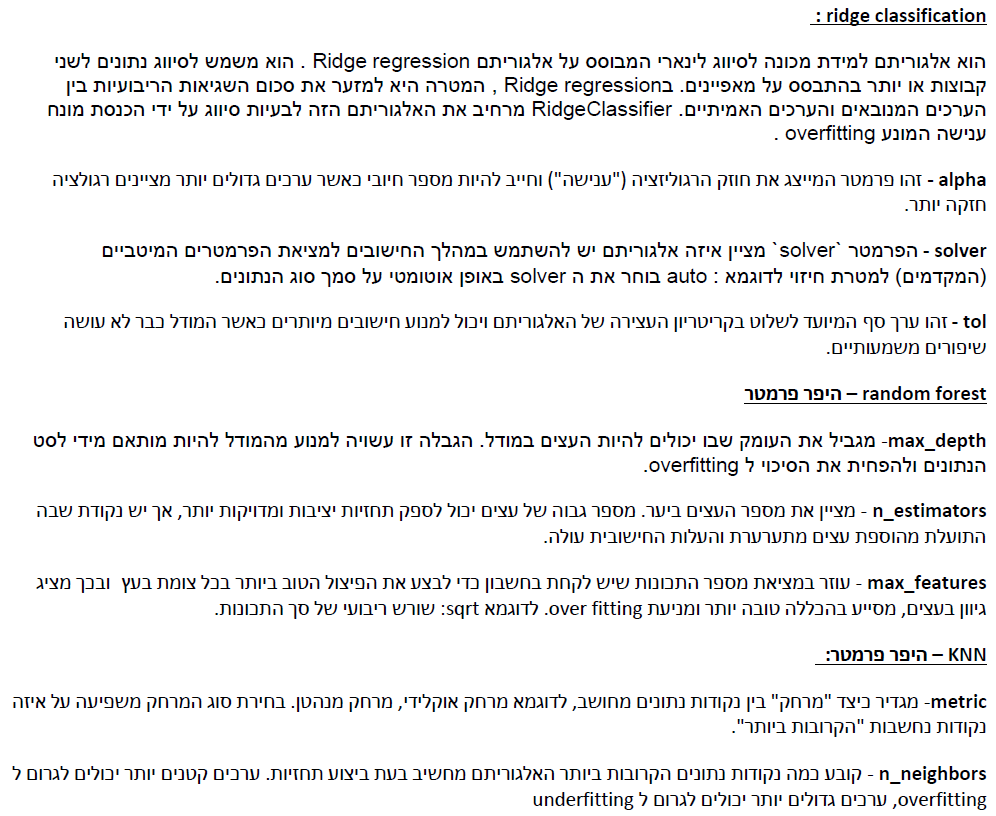

#9. A. Predict the y variable on both the train set and the test set (for both imputed datasets and for both algorithms - 18 predictions in total):
3 imputed datasets * 3 classification algorithms * (train+test)

and create and print a summrizing table of the accuracy, recall, precision and f1-score of each prediction.



In [ ]:
#your code here:

# Build a new Dataframe
columns = ["Name", "Dataset", "Accuracy", "Recall", "Precision", "F1 Score"]
df = pd.DataFrame(columns=columns)
data_matrix = [[X_test1, X_train1, y_test1, y_train1],[X_test2, X_train2, y_test2, y_train2],[X_test3, X_train3, y_test3, y_train3]]

index = 0
for name, grid in grid_models.items():
    for dataset_type, index2 in zip(["test", "train"], [0, 1]):
        predictions = grid.predict(data_matrix[index%3][index2])
        y_true = data_matrix[index%3][index2+2]

        # Calculate the metrics
        accuracy = accuracy_score(y_true, predictions)
        recall = recall_score(y_true, predictions)
        precision = precision_score(y_true, predictions)
        f1 = f1_score(y_true, predictions)

        # Insert data into Dataframe
        new_row = pd.DataFrame({
            "Name": [name],
            "Dataset": [dataset_type],
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1 Score": [f1]
        })
        df = pd.concat([df, new_row], ignore_index=True)
    index += 1

print(df)

                     Name Dataset  Accuracy    Recall  Precision  F1 Score
0       RandomForest mean    test  0.896711  0.888497   0.902417  0.895403
1       RandomForest mean   train  0.998246  0.996558   1.000000  0.998276
2     RandomForest median    test  0.906798  0.901278   0.910508  0.905869
3     RandomForest median   train  1.000000  1.000000   1.000000  1.000000
4   RandomForest frequent    test  0.904386  0.899074   0.907877  0.903454
5   RandomForest frequent   train  1.000000  1.000000   1.000000  1.000000
6              Ridge mean    test  0.736623  0.767298   0.721210  0.743540
7              Ridge mean   train  0.741228  0.764200   0.737542  0.750634
8            Ridge median    test  0.737281  0.766417   0.722476  0.743798
9            Ridge median   train  0.743860  0.769363   0.738843  0.753794
10         Ridge frequent    test  0.736404  0.766417   0.721277  0.743162
11         Ridge frequent   train  0.740351  0.764200   0.736318  0.750000
12        KNeighbors mean

#B. Verbally explain which model resulted with the best outcome with consideration to over-fitting, under-fitting and proper-fitting.


#Your answer here:

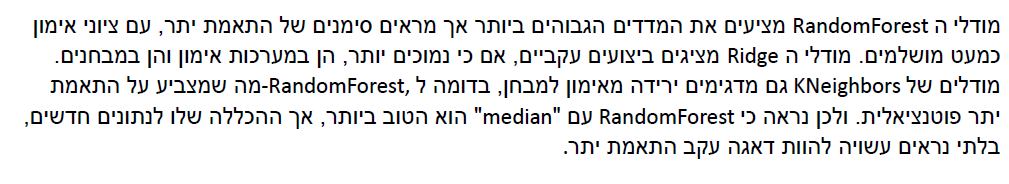



#C. Print the classification_report of both the trainset and the test set using the best model.


In [ ]:
#your code here:

print("RandomForest with median")
grid_predictions_test = grid_models['RandomForest median'].predict(X_test2)
grid_predictions_train = grid_models['RandomForest median'].predict(X_train2)
print(name + " test : \n" + classification_report(y_test2, grid_predictions_test))
print(name + " train : \n" + classification_report(y_train2, grid_predictions_train))

RandomForest with median
KNeighbors frequent test : 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2291
           1       0.91      0.90      0.91      2269

    accuracy                           0.91      4560
   macro avg       0.91      0.91      0.91      4560
weighted avg       0.91      0.91      0.91      4560

KNeighbors frequent train : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       559
           1       1.00      1.00      1.00       581

    accuracy                           1.00      1140
   macro avg       1.00      1.00      1.00      1140
weighted avg       1.00      1.00      1.00      1140



#D. Verbally explain 2 more quality measures of your choice. explain: is the score good? what is the meaning of each measure?

#Your answer here:

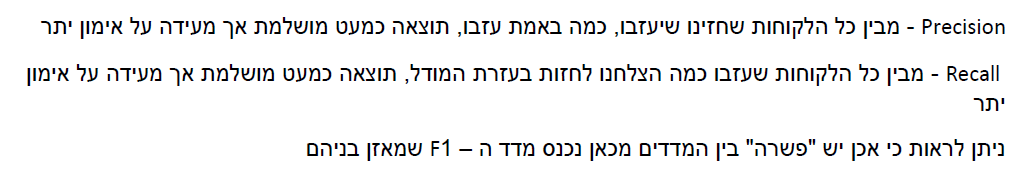






#Good Luck!